FIAP - Machine Learning & Modelling

# Aula 05 - Árvores de decisão

Vamos começar a desenvolver modelos de Machine Learning em Python, utilizando a biblioteca [_scikit-learn_](https://scikit-learn.org/stable/index.html). Nesta aula utillizaremos a famosa base de dados do Titanic, disponível no [Kaggle](https://www.kaggle.com/c/titanic). Nosso objetivo é desenvolver um modelo para predizer sobreviventes do naufrágio.

Construiremos diversos modelos preditivos ao longo das aulas, aprendendo na prática as semelhanças e diferenças entre eles.

**Objetivos de aprendizagem**:

- Recapitular o ciclo de desenvolvimento de Data Science, desde a elaboração da hipótese até a apresentação do resultado
- Exercitar o ciclo na prática, com o desenvolvimento de um modelo preditivo
- Conhecer as nuances práticas do modelo supervisionado de classificação baseado em árvore de decisão
- Se familiarizar com uma das principais bibliotecas de Python para Machine Learning


In [292]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Metodo para separação de TREINO e TESTE

# Algoritimos de Machine Learning

# Visualização da árvore

# Metrica de avaliação

%matplotlib inline


### Leitura da base de TREINO


In [293]:
df = pd.read_csv("data/titanic.csv")


In [294]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [295]:
df.shape


(891, 12)

### Limpeza da base de TREINO

- Usar apenas as features de interesse : _Survived, Age, Pclass, Sex_
- Remover linhas sem informação (NA)
- Transformar strings em dados numéricos


In [296]:
df.drop_duplicates(inplace=True)

df = df[['Survived', 'Age', 'Pclass', 'Sex']]

df.dropna(inplace=True)


In [297]:
df.dropna(inplace=True)


In [298]:
df.shape


(714, 4)

Expressão lambda para definir como a coluna SEX deve ter os valores alterados

Esta expressão tem o mesmo comportamento da seguinte função:

```python
def sexo(x):
    if x == "male":
        return 0
    else:
        return 1
```


In [299]:
df["Sex"] = df["Sex"].apply(lambda x: 0 if x == 'male' else 1)

df['Sex']


0      0
1      1
2      1
3      1
4      0
      ..
885    1
886    0
887    1
889    0
890    0
Name: Sex, Length: 714, dtype: int64

In [300]:
df


,Survived,Age,Pclass,Sex
0,0,22.0,3,0
1,1,38.0,1,1
2,1,26.0,3,1
3,1,35.0,1,1
4,0,35.0,3,0
...,...,...,...,...
885,0,39.0,3,1
886,0,27.0,2,0
887,1,19.0,1,1
889,1,26.0,1,0


### Machine learning (criação dos modelos)

Principais passos:

- dividir os dados entre treino e teste
- escolher qual modelo (algoritmo) utilizar
- criar o modelo em si (treino)
- avaliar o "poder preditivo" do método


In [301]:
X = df.drop(columns=['Survived'])
y = df["Survived"]


In [302]:
X


,Age,Pclass,Sex
0,22.0,3,0
1,38.0,1,1
2,26.0,3,1
3,35.0,1,1
4,35.0,3,0
...,...,...,...
885,39.0,3,1
886,27.0,2,0
887,19.0,1,1
889,26.0,1,0


In [303]:
y


0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

Aqui fazemos a separação entre TREINO e TESTE, efetivamente. Estamos pedindo uma divisão entre 25% dos dados para o TESTE e os outros 75% para o TREINO. Aqui existe uma separação aleatória entre os dados, cuja semente do gerador aleatório é o número 42. Os dados estão no datatrame **X** e os labels no dataframe **y**.

Os resultados serão:

- X_train = os dados do TREINO
- X_test = os dados do TESTE
- y_train = os labels do TREINO
- y_test = os labels do TESTE


In [304]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


In [305]:
X.shape


(714, 3)

In [306]:
X_train.shape


(535, 3)

In [307]:
X_test.shape


(179, 3)

Agora começamos a criar os modelos preditivos. É uma boa prática padronizarmos os dados, mas aqui estamos com uma base bem comportada, então não vamos nos preocupar com isso, podendo ir direto para as modelagens.

Para construir um **classificador baseado em árvore de decisão**, chamamos o construtor da classe "DecisionTreeClassifier()", realizamos o treinamento do modelo com os dados e labels do TREINO e na sequência obtemos os valores **preditos** do TESTE com o método "predict()"


In [308]:
# Arvore
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
Y_pred_label = tree.predict(X_test)


In [309]:
# Quais são as classes?
tree.classes_


array([0, 1])

In [310]:
# Quais são os labels preditos?
Y_pred_label


array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0])

In [311]:
# Qual a taxa de acerto?

acc = accuracy_score(y_test, Y_pred_label)

f'{acc*100:.2f}%'


'76.54%'

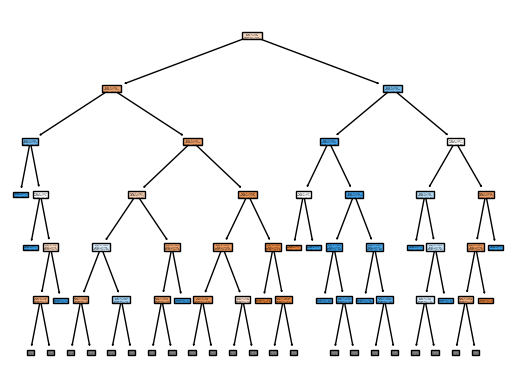

In [312]:
# Podemos visualizar a árvore criada?

_ = plot_tree(tree, filled=True, max_depth=5)



Agora vamos testar o comportamento dos mesmos dados num modelo de **Florestas Aleatórias**:


In [313]:
florest = RandomForestClassifier(n_estimators=100)
florest.fit(X_train, y_train)

y_pred_florest = florest.predict(X_test)

acc_florest = accuracy_score(y_test, y_pred_florest)

f'{acc_florest*100:.2f}%'


'77.09%'

## Trabalhando com a AUC

A AUC é a área abaixo da curva ROC. Nós vamos verificar o que esta métrica significa adiante e como ela se compara com outras métricas, como a ACC (acurácia).

Aqui o importante é saber que para cálculo da AUC nós precisamos das _probabilidades_ de cada exemplo do teste pertencer a alguma das classes! Para obter essas probabilidades, vamos usar o método `predict_proba()`.

**Em resumo**:

- **ACC** (acurária): mede a quantidade de acertos do método. Depende dos labels reais e dos _labels preditos_, obtidos com `predict()`;
- **AUC** (área abaixo da curva ROC): mede o aprendizado global do método, ou seja, o quanto ele performa melhor que uma escolha aleatória. Depende dos labels reais e das _probabilidades_ de cada exemplo pertercer a cada uma das classes, obtidas com `predict_proba()`;


In [314]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)


In [315]:
y_pred_prob = tree.predict_proba(X_test)


In [316]:
y_pred_prob


array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.9       , 0.1       ],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.

In [317]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_prob[:, 1])


0.7579179646936656

### Iterando por múltiplos modelos

Vamos construir outros modelos e testá-los de uma vez, armazenando os resultados para encontrarmos o mais promissor.


In [318]:
# "modelos" é uma lista de tuplas, sendo que cada tupla contém o construtor de um
# modelo de classificação, e seu nome como string
models = [
    (DecisionTreeClassifier(), '1 tree'),
    (RandomForestClassifier(n_estimators=5), "5 trees"),
    (RandomForestClassifier(n_estimators=10), "10 trees"),
    (RandomForestClassifier(n_estimators=100), "100 trees"),
    (RandomForestClassifier(n_estimators=500), "500 trees"),
    (RandomForestClassifier(n_estimators=5000), "5000 trees")
]


Aqui estamos iterando por cada modelo da lista `modelos`. Para cada tupla, desenformamos pegando o primeiro elemento e armazenando na variável `classificador`, e o segundo elemento na variável `nome`.

Para cada classificador, nós treinammos ( com o _fit()_ ) e obtemos as predições dos labels ( com _predict()_ ). Daí calculamos a ACC (acurácia) e imprimimos a resposta.


In [319]:
for model, name in models:
    model.fit(X_train, y_train)
    probs = model.predict_proba(X_test)
    auc = roc_auc_score(y_test, probs[:, 1])
    print(f'{name}: {auc:.3f}')


1 tree: 0.758
5 trees: 0.796
10 trees: 0.798
100 trees: 0.808
500 trees: 0.806
5000 trees: 0.805


## Construindo o modelo final

Agora que sabemos qual é o melhor modelo que avaliamos, vamos usar TODO o dataset original para criar o modelo final baseado na melhor opção e em todos os dados existentes.

Este modelo será utilizado para fazer predições de **novos dados**! Preencham: https://forms.gle/p4Z8JWRiYoUanFKw7

<font color="red"> **IMPORTANTE:** </font> devido às variações aleatórias nas inicializações dos métodos, talvez quando vc executar o código acima novamente outro modelo pode ter o melhor resultado!


In [320]:
final_model = RandomForestClassifier(n_estimators=500)
final_model.fit(X, y)

RandomForestClassifier(n_estimators=500)

Vamos pegar as respostas que vocês deram para prever quem sobreviveria ao desastre do Titanic. Para isso, devemos:

- Ler os dados
- Fazer os mesmos procedimentos de limpeza que anteriormente
- Selecionar as MESMAS VARIÁVEIS QUE ALIMENTARAM O MODELO, E NA MESMA ORDEM para serem as variáveis que basearão a resposta do modelo


In [321]:
students = pd.read_csv('data/alunos.csv')

students.dropna(inplace=True)
students.drop_duplicates(inplace=True)


students.head()

,Carimbo de data/hora,Nome,Idade,Classe,Sexo
0,2023/03/27 11:32:10 da manhã GMT-3,Henrique Marra Barbosa,19,3,Homem
1,2023/03/27 11:32:11 da manhã GMT-3,Cauã Simões Pinheiro,19,2,Homem
2,2023/03/27 11:32:22 da manhã GMT-3,Ana Cristina Araújo Oliveira,18,3,Mulher
3,2023/03/27 11:32:23 da manhã GMT-3,Michel Fornaciali,35,2,Homem
4,2023/03/27 11:32:37 da manhã GMT-3,Otávio Lira Neves,18,2,Homem


In [322]:
# Limpando os dados no mesmo formato que antes: Homem -> 0 ; Mulher -> 1
students['Sexo'] = students['Sexo'].apply(lambda x: 0 if x == 'Homem' else 1)

students.head()

,Carimbo de data/hora,Nome,Idade,Classe,Sexo
0,2023/03/27 11:32:10 da manhã GMT-3,Henrique Marra Barbosa,19,3,0
1,2023/03/27 11:32:11 da manhã GMT-3,Cauã Simões Pinheiro,19,2,0
2,2023/03/27 11:32:22 da manhã GMT-3,Ana Cristina Araújo Oliveira,18,3,1
3,2023/03/27 11:32:23 da manhã GMT-3,Michel Fornaciali,35,2,0
4,2023/03/27 11:32:37 da manhã GMT-3,Otávio Lira Neves,18,2,0


In [323]:
# Eliminando algumas variáveis inúteis
students = students[ ["Nome", "Idade", "Classe", "Sexo"] ]
students.columns = ['Nome', 'Age', 'Pclass', 'Sex']
students.head()

,Nome,Age,Pclass,Sex
0,Henrique Marra Barbosa,19,3,0
1,Cauã Simões Pinheiro,19,2,0
2,Ana Cristina Araújo Oliveira,18,3,1
3,Michel Fornaciali,35,2,0
4,Otávio Lira Neves,18,2,0


Aqui vamos pegar as predições do modelo, usando apenas os dados que importam, na ordem adequada.


In [324]:
response = final_model.predict(students.drop(columns=['Nome']))

final_pred_prob = final_model.predict_proba(students.drop(columns=['Nome']))

final_pred_prob

array([[0.92440762, 0.07559238],
       [0.75719048, 0.24280952],
       [0.61880521, 0.38119479],
       [0.97804192, 0.02195808],
       [0.992     , 0.008     ],
       [0.87299383, 0.12700617],
       [0.934     , 0.066     ],
       [0.992     , 0.008     ],
       [0.87299383, 0.12700617],
       [0.81643022, 0.18356978],
       [0.        , 1.        ],
       [0.002     , 0.998     ],
       [0.75719048, 0.24280952],
       [0.788     , 0.212     ],
       [0.        , 1.        ],
       [0.934     , 0.066     ],
       [0.97383333, 0.02616667],
       [0.934     , 0.066     ],
       [0.        , 1.        ],
       [0.934     , 0.066     ],
       [0.002     , 0.998     ],
       [0.788     , 0.212     ],
       [0.788     , 0.212     ]])

In [325]:
# Coluna de saída do modelo

students['Survived'] = response

In [326]:
# Coluna de interpretação do modelo. NOTA: o problema original é verificar os "sobreviventes",
# logo a classe 1 indica que sobreviveu, e a classe 0 que NÃO sobreviveu
students["Sobreviveu?"] = students["Survived"].apply(lambda x: 'Sim' if x == 1 else 'Não')

In [327]:
students

,Nome,Age,Pclass,Sex,Survived,Sobreviveu?
0,Henrique Marra Barbosa,19,3,0,0,Não
1,Cauã Simões Pinheiro,19,2,0,0,Não
2,Ana Cristina Araújo Oliveira,18,3,1,0,Não
3,Michel Fornaciali,35,2,0,0,Não
4,Otávio Lira Neves,18,2,0,0,Não
5,Fabricio Yukio Yamashiro,18,3,0,0,Não
6,Raphael Papa,17,2,0,0,Não
7,Matheus Oliveira de Andrade,18,2,0,0,Não
8,Kauã,18,3,0,0,Não
9,Jack Dawson,25,3,0,0,Não
